# GeoCLEWs Adaptation for ZAMBIA: Enhancing Policy Coherence for Sustainable Development in Zambia: A CLEWs-Based Approach to the Climate-Water-Energy-Food Nexus 

**Revised code:** [Kumbuso Joshua Nyoni](https://github.com/Kumbutso-Bird) <br />
**Affiliation:** University of Edinburgh <br />

Original code(s): [Alexandros Korkovelos](https://github.com/akorkovelos) <br /> & [Yalda Saedi](https://github.com/Ysaedi) <br />
Supervision: James Patterson & Francesco Gardumi <br />
Funding: Commonwealth <br />

---------------------------

## Summary

GeoCLEWs is a versatile open-source script that offers a wide range of useful features for both developers and users. It is designed to efficiently collect, analyze, and process Global Agro-ecological Zones (GAEZ) data, including high-resolution land and water data, in an automated manner. The original code were rendered non-functional due to its incompatibility with the latest version of the GAEZ v4 dataset. The code has been subject to significant revisions and improvements aimed at increasing its efficiency and ease of use. Leveraging open-source tools and open datasets, the new script is designed to utilize GAEZ v4 datasets to process agro-climatic potential yield, crop water deficit, crop evapotranspiration, precipitation, and land cover.The script streamlines the detailed land and water processing steps required for Climate Land Energy Water systems (CLEWs) modelling.

At the beginning of the script, users are required to provide inputs and customize the setup according to their specific project requirements. Once the necessary inputs are provided, the script will automatically execute the subsequent steps, including the collection of FAOSTAT (Food and Agriculture Organization of the United Nation) and GAEZ data based on the user-provided inputs. 

This notebook performs Five main analytical processes:

- **Part 1**: Initialization and configuration.
- **Part 2**: FAOSTAT and GAEZ data collection and preparation.
- **Part 3**: Generating clusters.
- **Part 4**: Geospatial attributes extraction to clusters.
- **Part 5**: Calculating key summary statistics generate outputs for further use in CLEWs modelling.

Each part below is accompanied by a more detailed explanation of the involved processing steps.

# Part 1 : Initialization and Configuration

# 1.1. Importing Essential Modules 

To begin, it is necessary to import the required modules/libraries. For more information on the environment setup, please consult the README file. 

In [10]:
pip install rasterio

  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/b3/0f/e7f21b87636029955ab4e0e81027dc491d99c2b6215e68c6d8f38e5291b3/rasterio-1.3.9-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for affine from https://files.pythonhosted.org/packages/0b/f7/85273299ab57117850cc0a936c64151171fac4da49bc6fba0dad984a7c5f/affine-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for snuggs>=1.4.1 from https://files.pythonhosted.org/packages/cc/0e/d27d6e806d6c0d1a2cfdc5d1f088e42339a0a54a09c3343f7f81ec8947ea/snuggs-1.4.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/23.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/23.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/23.4 MB 653.6 kB/s eta 0:00:36
   ---------------------------------------- 0.0/23.4 MB 653.6 kB/s eta 0:00:36
   ---------------------------------------- 0.1/23.4 MB 409.6 kB/s eta 0:00:57
   ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install rasterstats

  Obtaining dependency information for rasterstats from https://files.pythonhosted.org/packages/02/64/ac8b537b3213740e875e0b3d8b8fe97ebf64a592803d44cefc381576c326/rasterstats-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for simplejson from https://files.pythonhosted.org/packages/b6/8e/3e12d122dfdf549a8d12eaf39954ee39f2027060aa38b63430f8ab3244e7/simplejson-3.19.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.3 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.3 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.3 kB 186.2 kB/s eta 0:00:01
   --------------------- ------------------ 41.0/75.3 kB 195.7 kB/s eta 0:00:01
   ---------------------------------------- 75.3/75.3 kB 320.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated

In [2]:
pip install geojson

  Obtaining dependency information for geojson from https://files.pythonhosted.org/packages/8e/1b/4f57660aa148d3e3043d048b7e1ab87dfeb85204d0fdb5b4e19c08202162/geojson-3.1.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [7]:
conda install gdal

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\user\anaconda3

  added / updated specs:
    - gdal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.3.11  |       haa95532_0         128 KB
    cairo-1.16.0               |       haedb8bc_5         1.9 MB
    certifi-2024.2.2           |  py311haa95532_0         162 KB
    conda-23.7.4               |  py311haa95532_0         1.3 MB
    cryptography-39.0.1        |  py311h21b164f_0         1.0 MB
    expat-2.5.0                |       hd77b12b_0         225 KB
    fontconfig-2.14.1          |       h9c4af85_2         198 KB
    freexl-1.0.6               |       h2bbff1b_0          51 KB
    gdal-3.6.2                 |  

In [3]:
import osgeo.gdal as gdal


In [4]:
# Importing necessary Python modules or libraries

# Numerical
import numpy as np
import pandas as pd
import requests

# Spatial
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
from geojson import Feature, Point, FeatureCollection
import json
from shapely.geometry import Polygon, Point
#import gdal
import osgeo.gdal as gdal #modification to code by Kumbuso
from pyproj import CRS
from rasterio.mask import mask

#Plotting
import ipywidgets
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display, Markdown, HTML
import matplotlib.pyplot as plt
%matplotlib inline

# System & Other
import time
import os
import datetime
start_time = time.time()


# 1.2. User Configuration  
This is the only part where the user needs to input values. The rest of the process will be automatically run based on the provided inputs. The code is designed with flexibility, allowing users to make changes and take advantage of customized settings at any time during the execution.


In [5]:
# Provide specifications for the project 

Full_name = "Zambia"             # Specify the full name of the country you wish to analyze (e.g. Zambia).

RCP = "RCP4.5"                  # Choose your preferred RCP (Representative Concentration Pathway) from the available options: RCP2.6, RCP4.5, RCP6.0, RCP8.5.


admin_level = 1                 # 0 for national processing, admin level 0.
                                # 1 for processing at admin level 1.

#Aggregating regions    
aggregate = False               # If you are processing at admin level 1 and there are more than 7 regions, it is advised to group regions to speed up computational processing.                            
                                # "False" indicates no aggregation, "True" performs aggregation. 
                                # Set to True to aggregate into groups.

region_per_group = 10           # Number of regions to be grouped into one group.
Extract = False                 # In the case of aggregation, there is an option to extract a specific region and avoid aggregation. 
Ext_region = "SOU"              # It is required to input the first 3 letters of the specific region e.g. "SOU" refers to Southern Province in Zambia.
                                


## Coordinate and projection systems
crs_WGS84 = CRS("EPSG:4326")    # For analysis, the original WGS84 coordinate system is used. 
crs_proj = CRS("EPSG:32735")    # Please provide proper projection system based on the geographical location of the selected country. 
                                # In this example EPSG:32735 refers to a specific projection system called the "Zambian Mapping Grid".
                                # More info: http://epsg.io/ 

## 1.3. Directory Initialization and Structure

For easier replication of the code you may used the following directory structure:

* **~root/Data/input**    (a directory where your input data)
* **~root/global_raster_input**   (directory for GAEZ raster layers with global coverage.  Precipitation and land cover rasters have already downloaded in the global_raster_input while agro-climatic potential yield, crop water deficit, and crop evapotranspiration with global coverage will be downloaded automatically in the following steps based on user input)
* **~root/cropped_raster_input** (a directory for cropped GAEZ global raster data based on administraty boundry of selected country to reduce computational complexity)

Results will be store in two automatically generated directories:
* **~root/Data/output**   (directory for general output)
* **~root/Data/output/summary_stats**   (a directory where the tabular outputs data and graphs are stored)

**Note!** In case you decide to use a different structure please revise the code below.

In [8]:
# Directories
ROOT_DIR = os.path.abspath(os.curdir)
data_folder = "Data"
in_path = os.path.join(ROOT_DIR, data_folder + "\\"+ 'input')
in_path_raster = os.path.join(ROOT_DIR, 'global_raster_input')
out_path_raster = os.path.join(ROOT_DIR, 'cropped_raster_input')
if not os.path.exists(out_path_raster):
    try:
        os.makedirs(out_path_raster)
    except OSError as exc: 
        if exc.errno != errno.EEXIST:
            raise

out_path = os.path.join(ROOT_DIR, data_folder + "\\"+ 'output')
if not os.path.exists(out_path):
    try:
        os.makedirs(out_path)
    except OSError as exc: 
        if exc.errno != errno.EEXIST:
            raise

if not os.path.exists(out_path):
    try:
        os.makedirs(out_path)
    except OSError as exc:                             
        if exc.errno != errno.EEXIST:
            raise
summary_stats_path = out_path + "\\" + "summary_stats"
if not os.path.exists(summary_stats_path):
    try:
        os.makedirs(summary_stats_path)
    except OSError as exc:                                         # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise


# 3 letter ISO code of the selected country
code = pd.read_csv('Country_code.csv')                            # More info: https://www.nationsonline.org/oneworld/country_code_list.htm                                        
code_name = code[code['Full_name']== Full_name]
country_name = code_name.iloc[0]['country_code']            
                        
            
# supporting vector point name
shp_nm = "{}_data.shp".format(country_name)
    
#administrative boundary
admin0_nm = '{}_adm0.shp'.format(country_name)                     # administrative boundaries - national analysis

# Name of final result file
output_nm = "{}_vector_admin{}_clusters".format(country_name, admin_level)
result_nm = "{}_vector_admin{}_clusters_with_attributes".format(country_name, admin_level)

# Part 2 : FAOSTAT and GAEZ Data Collection and Preparation

## 2.1. FAOSTAT Collection and Preparation
Finding top 10 crops in terms of harvested area from the latest statistical database provided by Food and Agriculture Organization of the United Nations (FAOSTAT).

### 2.1.1. Retrieve Top 20 Crops

In [14]:
# Read the FAOSTAT file
data = pd.read_csv('FAOSTAT_2020.csv')
filtered_data = data[data['Area'] == Full_name]                

# Sorting based on the harvested area in descending order and get top 10 rows
# Retrieve data according to the user-defined country
top_10_values = filtered_data.nlargest(20, 'Value')
all_crops = top_10_values['Item'].tolist() 

main_crops= all_crops[:10]
other_crops = all_crops[10:]

display(Markdown(' **Top 10 crops considering harvested area are:** {}'.format(main_crops)))
display(Markdown(' **Crops ranked from eleven to twenty in the top 20 FAO dataset are:** {}'.format(other_crops)))

 **Top 10 crops considering harvested area are:** ['Maize (corn)', 'Soya beans', 'Groundnuts, excluding shelled', 'Cassava, fresh', 'Sunflower seed', 'Beans, dry', 'Seed cotton, unginned', 'Other pulses n.e.c.', 'Millet', 'Sweet potatoes']

 **Crops ranked from eleven to twenty in the top 20 FAO dataset are:** ['Other vegetables, fresh n.e.c.', 'Sugar cane', 'Sorghum', 'Bambara beans, dry', 'Wheat', 'Rice', 'Cow peas, dry', 'Other tropical fruits, n.e.c.', 'Unmanufactured tobacco', 'Coffee, green']

### 2.1.2. FAOSTAT Standardizing

In [15]:
# FAO correction: 3 letter naming convention per crop considering CLEWs naming format

Crop_code = pd.read_csv('Crop_code.csv')
crop_name = []  

for item in main_crops:
    matching_rows = Crop_code[Crop_code['Name']==item]
    
    if not matching_rows.empty:
        crop_name.extend(matching_rows['Code'].tolist())  

other_crop_name = []  

for item in other_crops:
    matching_rows = Crop_code[Crop_code['Name']==item]
    
    if not matching_rows.empty:
        other_crop_name.extend(matching_rows['Code'].tolist())  


#Adding "prc" refering to annual precipitation
crop_name = crop_name + ["prc"]

display(Markdown(' **Based on 3-letter naming, the main crop list from the FAOSTAT is :** {}'.format(crop_name)))
display(Markdown(' **Based on 3-letter naming, additional crop list from the FAOSTAT is :** {}'.format(other_crop_name)))



 **Based on 3-letter naming, the main crop list from the FAOSTAT is :** ['MZE', 'SOY', 'GRO', 'CAS', 'SUN', 'BEA', 'COT', 'MLT', 'PTS', 'prc']

 **Based on 3-letter naming, additional crop list from the FAOSTAT is :** ['SGC', 'SOR', 'WHE', 'COW', 'TOB', 'COF']

## 2.2. GAEZ Data Collection and Preparation

GeoCLEWs collects TIFF data from the Global Agro-Ecological Zones data portal for the following variables: agro-climatic potential yield, crop water deficit, and crop evapotranspiration. Precipitation, and land cover have already downloaded in the directory.

### 2.2.1. GAEZ Data Acquisition

In [17]:
#Import agro-climatic potential yield 
yld_High_input = pd.read_csv('GAEZ_yld_High_Input.csv')
yld_Low_input = pd.read_csv('GAEZ_yld_Low_Input.csv')

#Import crop water deficit
cwd_High_input = pd.read_csv('GAEZ_cwd_High_Input.csv')
cwd_Low_input = pd.read_csv('GAEZ_cwd_Low_Input.csv')

#Import crop evapotranspiration 
evt_High_input = pd.read_csv('GAEZ_evt_High_Input.csv')
evt_Low_input = pd.read_csv('GAEZ_evt_Low_Input.csv')


### 2.2.2. GAEZ Data Preprocessing

In [18]:
#Add a new column for water supply
yld_High_input['New Water Supply'] = yld_High_input['Water Supply'].apply(lambda x: 'Irrigation' if 'irrigation' in x else 'Rain-fed')
yld_Low_input['New Water Supply'] = yld_Low_input['Water Supply'].apply(lambda x: 'Irrigation' if 'irrigation' in x else 'Rain-fed')

cwd_High_input['New Water Supply'] = cwd_High_input['Water Supply'].apply(lambda x: 'Irrigation' if 'irrigation' in x else 'Rain-fed')
cwd_Low_input['New Water Supply'] = cwd_Low_input['Water Supply'].apply(lambda x: 'Irrigation' if 'irrigation' in x else 'Rain-fed')

evt_High_input['New Water Supply'] = evt_High_input['Water Supply'].apply(lambda x: 'Irrigation' if 'irrigation' in x else 'Rain-fed')
evt_Low_input['New Water Supply'] = evt_Low_input['Water Supply'].apply(lambda x: 'Irrigation' if 'irrigation' in x else 'Rain-fed')

### 2.2.3. GAEZ Data Standardizing

In [19]:
        
def GAEZ_naming (dataset, filename):
    
    dataset['New Crop'] = dataset['Crop'].apply(lambda x: Crop_code.loc[Crop_code['GAEZ_name'] == x, 'Code'].values[0] if x in Crop_code['GAEZ_name'].values else 'Nan')
    dataset.to_csv(filename, index=False)
    
GAEZ_naming (yld_High_input, 'New_yld_High_input.csv')    
GAEZ_naming (yld_Low_input, 'New_yld_Low_input.csv') 
GAEZ_naming (cwd_High_input, 'New_cwd_High_input.csv') 
GAEZ_naming (cwd_Low_input, 'New_cwd_Low_input.csv') 
GAEZ_naming (evt_High_input, 'New_evt_High_input.csv') 
GAEZ_naming (evt_Low_input, 'New_evt_Low_input.csv') 

### 2.2.4. GAEZ Data Filtering according to User Configuration

In [20]:
#filtering in accordance with user-defined RCP 
Filtered_yld_High_input = yld_High_input[yld_High_input['RCP'] == RCP]
Filtered_cwd_High_input = cwd_High_input[cwd_High_input['RCP'] == RCP]
Filtered_evt_High_input = evt_High_input[evt_High_input['RCP'] == RCP]

#filtering based on with user-defined crops
def GAEZ_List(dataframe, crop_list, column):
    List = pd.DataFrame()
    for crop in crop_list:
        if dataframe[column].str.contains(crop).any():
            List = pd.concat([List, dataframe[dataframe[column].str.contains(crop)]])
    return List



Main_yld_High=GAEZ_List(Filtered_yld_High_input, crop_name, "New Crop")
Other_yld_High=GAEZ_List(Filtered_yld_High_input, other_crop_name, "New Crop")
Main_yld_Low=GAEZ_List(yld_Low_input, crop_name, "New Crop")
Other_yld_Low=GAEZ_List(yld_Low_input, other_crop_name, "New Crop")

Main_cwd_High=GAEZ_List(Filtered_cwd_High_input, crop_name, "New Crop")
Other_cwd_High=GAEZ_List(Filtered_cwd_High_input, other_crop_name, "New Crop")
Main_cwd_Low=GAEZ_List(cwd_Low_input, crop_name, "New Crop")
Other_cwd_Low=GAEZ_List(cwd_Low_input, other_crop_name, "New Crop")

Main_evt_High=GAEZ_List(Filtered_evt_High_input, crop_name, "New Crop")
Other_evt_High=GAEZ_List(Filtered_evt_High_input, other_crop_name, "New Crop")
Main_evt_Low=GAEZ_List(evt_Low_input, crop_name, "New Crop")
Other_evt_Low=GAEZ_List(evt_Low_input, other_crop_name, "New Crop")


### 2.2.5. Downloading and Storing GAEZ Raster Files in a clewsy-Compatible Format

In [21]:
def download_URL(dataframe, column, folder_name):
    for index, row in dataframe.iterrows():
        url = str(row[column])
        filename = str(row['New Crop']) + ' ' + ('cwd' if str(row['Name'].split('_')[-1]) == "wde" else 'evt' if str(row['Name'].split('_')[-1]) == "eta" else str(row['Name'].split('_')[-1])) + ' ' + str(row['New Water Supply']) + ' ' + str(row['Input Level'])
        file_path = os.path.join(folder_name, filename + '.tif')

        response = requests.get(url)

        with open(file_path, 'wb') as file:
            file.write(response.content)

        print(f"Downloaded: {filename}")


download_URL(Main_yld_High, 'Download URL', in_path_raster)
download_URL(Other_yld_High, 'Download URL', in_path_raster)
download_URL(Main_yld_Low, 'Download URL', in_path_raster)
download_URL(Other_yld_Low, 'Download URL', in_path_raster)

download_URL(Main_cwd_High, 'Download URL', in_path_raster)
download_URL(Other_cwd_High, 'Download URL', in_path_raster)
download_URL(Main_cwd_Low, 'Download URL', in_path_raster)
download_URL(Other_cwd_Low, 'Download URL', in_path_raster)

download_URL(Main_evt_High, 'Download URL', in_path_raster)
download_URL(Other_evt_High, 'Download URL', in_path_raster)
download_URL(Main_evt_Low, 'Download URL', in_path_raster)
download_URL(Other_evt_Low, 'Download URL', in_path_raster)


Downloaded: MZE yld Irrigation High
Downloaded: MZE yld Rain-fed High
Downloaded: SOY yld Irrigation High
Downloaded: SOY yld Rain-fed High
Downloaded: GRO yld Irrigation High
Downloaded: GRO yld Rain-fed High
Downloaded: CAS yld Irrigation High
Downloaded: CAS yld Rain-fed High
Downloaded: SUN yld Irrigation High
Downloaded: SUN yld Rain-fed High
Downloaded: BEA yld Irrigation High
Downloaded: BEA yld Rain-fed High
Downloaded: COT yld Irrigation High
Downloaded: COT yld Rain-fed High
Downloaded: MLT yld Irrigation High
Downloaded: MLT yld Rain-fed High
Downloaded: PTS yld Irrigation High
Downloaded: PTS yld Rain-fed High
Downloaded: SGC yld Irrigation High
Downloaded: SGC yld Rain-fed High
Downloaded: SOR yld Irrigation High
Downloaded: SOR yld Rain-fed High
Downloaded: WHE yld Irrigation High
Downloaded: WHE yld Rain-fed High
Downloaded: COW yld Irrigation High
Downloaded: COW yld Rain-fed High
Downloaded: TOB yld Irrigation High
Downloaded: TOB yld Rain-fed High
Downloaded: COF yld 

# Part 3: Generating Clusters

## 3.1. Generating Georeferenced Point Grid from Shapefile
Considering the resolution of GAEZ raster files, it is recommended to set spacing to 0.09 decimal degrees resulting in a detailed land and water analysis.

In [23]:
#create a GeoDataFrame from the attributes and geometry of the shapefile
shapefile = gpd.read_file(in_path + "\\" + shp_nm)
shapefile = shapefile.to_crs(crs_WGS84)

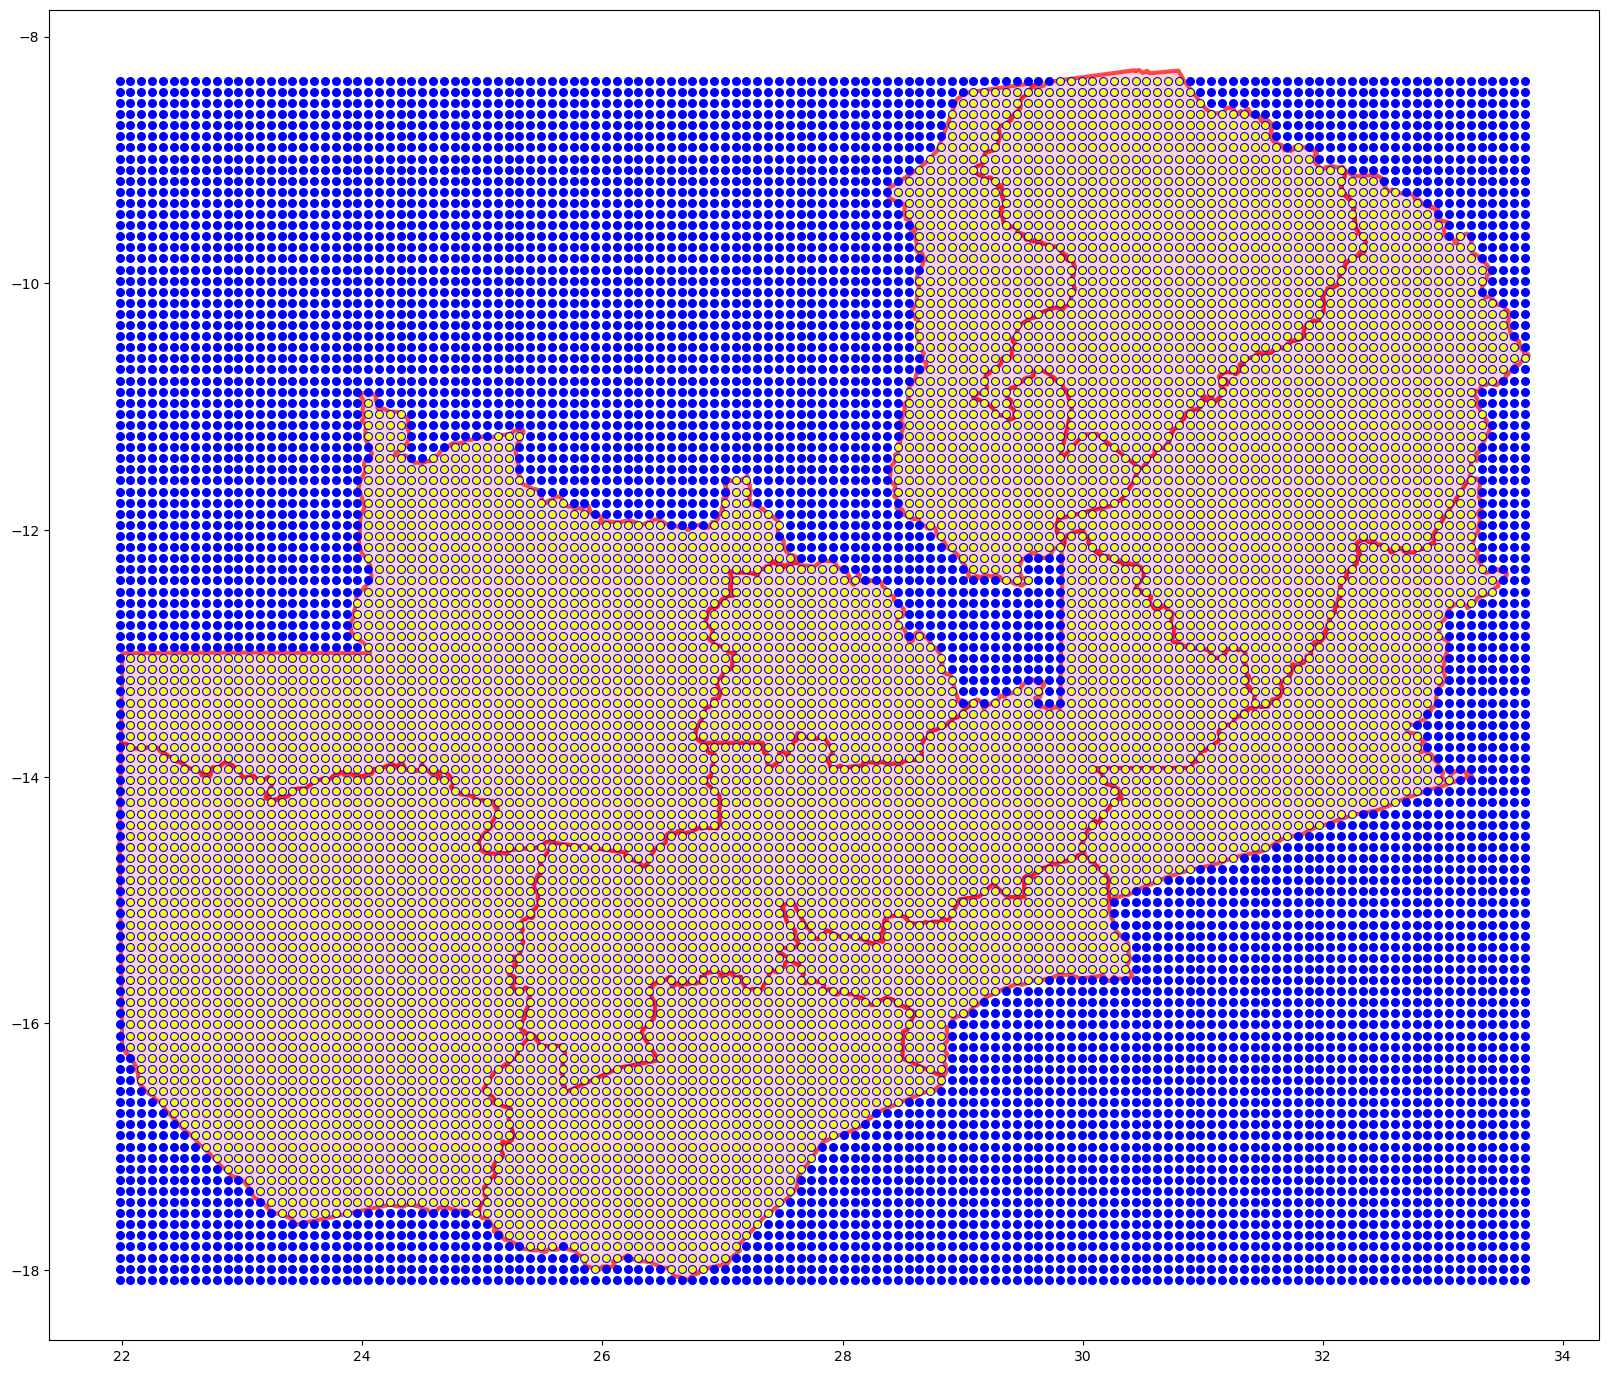

In [24]:
#Creating point grid
spacing = 0.09
xmin, ymin, xmax, ymax = shapefile.total_bounds

xcoords = [i for i in np.arange(xmin, xmax, spacing)]
ycoords = [i for i in np.arange(ymin, ymax, spacing)]

pointcoords = np.array(np.meshgrid(xcoords, ycoords)).T.reshape(-1, 2) 
points = gpd.points_from_xy(x=pointcoords[:,0], y=pointcoords[:,1])
grid = gpd.GeoSeries(points, crs=shapefile.crs)
grid.name = 'geometry'


#only points inside administrative boundary:
gridinside = gpd.sjoin(gpd.GeoDataFrame(grid), shapefile[['geometry']], how="inner")

#Plot georeferenced point grid
fig, ax = plt.subplots(figsize=(20, 20))
shapefile.plot(ax=ax, alpha=0.7, color="pink", edgecolor='red', linewidth=3)
grid.plot(ax=ax, markersize=30, color="blue")
gridinside.plot(ax=ax, markersize=15, color="yellow")
file_path = os.path.join(out_path, data_folder + "_PointGrid.png")
plt.savefig(file_path)

## 3.2. Converting Points to Polygons

A regular grid point is created across the entire area of interest in the previous step. Georeferenced points have unique latitude and longitude. In this step,  square buffer-based polygons are created around each point. This allows further flexibility in the extraction of raster values using stats. The buffered polygon shall split "equally" the area between neighbor points; therefore, the buffer used shall be the half of the distance between two neighbor points. This, in turn depends on the location of the AoI on earth and the projection system used. 

### 3.2.1. Spatial Join
Assigning the same administrative region as defined in the GeoDataFrame to the 'cluster' column.

In [25]:
# Calculate the centroids 
clustered_gdf = gridinside
clustered_gdf = clustered_gdf.to_crs(crs_WGS84)

In [26]:
# Rename the columns to cluster
clustered_gdf.rename(columns={'index_right': 'cluster'}, inplace=True)

# Convert cluster column to string
clustered_gdf.cluster = clustered_gdf.cluster.astype(str).replace('0', 'NaN')

In [27]:
# Reset the index of the left dataframe
clustered_gdf = clustered_gdf.reset_index(drop=True)

if admin_level == 0:
    # Perform the spatial join
    clustered_gdf = gpd.sjoin(clustered_gdf, shapefile[["geometry", "GID_0"]], op='within').drop(['cluster'], axis=1)
    
    # Rename the 'GID_0' column to 'cluster'
    clustered_gdf.rename(columns={'GID_0': 'cluster'}, inplace=True)
else:
    # Perform the spatial join
    clustered_gdf = gpd.sjoin(clustered_gdf, shapefile[["geometry", "NAME_1"]], op='within').drop(['cluster'], axis=1)
    
    # Rename the 'NAME_1' column to 'cluster'
    clustered_gdf.rename(columns={'NAME_1': 'cluster'}, inplace=True)

# Print the first 5 rows of the joined GeoDataFrame
clustered_gdf.head(3)


c:\Users\user\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,geometry,index_right,cluster
0,POINT (22.07004 -16.18918),9,Western
1,POINT (22.07004 -16.09918),9,Western
2,POINT (22.07004 -16.00918),9,Western


In [28]:
# create a new column based on first 3 letters of the 'cluster' column
clustered_gdf['new_cluster'] = clustered_gdf['cluster'].apply(lambda x:  x[:3]).str.upper()
clustered_gdf = clustered_gdf.rename(columns={'cluster': 'old_cluster'})
clustered_gdf = clustered_gdf.rename(columns={'new_cluster': 'cluster'})
clustered_gdf = clustered_gdf.drop(columns=['old_cluster'])
clustered_gdf.head(3)


,geometry,index_right,cluster
0,POINT (22.07004 -16.18918),9,WES
1,POINT (22.07004 -16.09918),9,WES
2,POINT (22.07004 -16.00918),9,WES


### 3.2.2. Generating Polygon
Creating Polygons From Georeferenced Clustered Grid Points

In [29]:
#Buffer value used should be half the distance between two adjacent points, which in turn is dependent on the location of the Area of Interest (AoI) on Earth and the projection system being used.
buffer_value = 0.045

In [30]:
#cap_style refers to the type of geometry generated; 3=square (see shapely documectation for more info -- https://shapely.readthedocs.io/en/stable/manual.html)

clustered_gdf['geometry'] = clustered_gdf.apply(lambda x:
                                                          x.geometry.buffer(buffer_value, cap_style=3), axis=1)

clustered_gdf.head(3)


,geometry,index_right,cluster
0,"POLYGON ((22.11504 -16.14418, 22.11504 -16.234...",9,WES
1,"POLYGON ((22.11504 -16.05418, 22.11504 -16.144...",9,WES
2,"POLYGON ((22.11504 -15.96418, 22.11504 -16.054...",9,WES


**Note!** Several features are not classified into a cluster. While points away of the administrative borders will be cut out of the analysis, some points right next to the outer administrative borders might create inconsistency when calculating area. In the following section we are dealing with this problem.

## 3.3. Total Area Re-Estimation & Calibration

This step estimates and calibrates the area (in square km) based on the area provided by the admin layer used in the analysis (e.g. clipping). 

### 3.3.1. Area Calibration

In [31]:
#Read admin layer as GeoDtaFrame
admin = gpd.read_file(in_path + "\\" + admin0_nm)

#Project to proper crs
admin = admin.to_crs(crs_proj)

In [32]:
final_clustered_GAEZ_gdf = clustered_gdf
final_clustered_GAEZ_gdf.head(3)

,geometry,index_right,cluster
0,"POLYGON ((22.11504 -16.14418, 22.11504 -16.234...",9,WES
1,"POLYGON ((22.11504 -16.05418, 22.11504 -16.144...",9,WES
2,"POLYGON ((22.11504 -15.96418, 22.11504 -16.054...",9,WES


In [33]:
# Project datasets to proper crs
final_clustered_GAEZ_gdf_prj = final_clustered_GAEZ_gdf.to_crs(crs_proj)

In [34]:
#add a column for area calculation
final_clustered_GAEZ_gdf_prj["sqkm"] = final_clustered_GAEZ_gdf_prj['geometry'].area/10**6

In [35]:
def get_multiplier(estimated, official):
    if official == estimated:
        return 1
    try:
        return  official / estimated
    except ZeroDivisionError:
        return 0

In [36]:
estimated_area = final_clustered_GAEZ_gdf_prj.sqkm.sum()
official_area = admin.geometry.area.sum()/10**6

# Estimate column multipler
multiplier = get_multiplier(estimated_area, official_area)

In [37]:
final_clustered_GAEZ_gdf_prj.sqkm = final_clustered_GAEZ_gdf_prj.sqkm * multiplier

In [38]:
print ("Our modelling exercise yields a total area of {0:.1f} sqkm for the country".format(estimated_area))
print ("The admin layer indicates {0:.1f} sqkm".format(official_area))
print ("After calibration the total area is set at {0:.1f} sqkm".format(final_clustered_GAEZ_gdf_prj.sqkm.sum()))

Our modelling exercise yields a total area of 750456.0 sqkm for the country
The admin layer indicates 752816.3 sqkm
After calibration the total area is set at 752816.3 sqkm


### 3.3.2. Final Check

In [39]:
#Revert to original crs
final_clustered_GAEZ_gdf = final_clustered_GAEZ_gdf_prj.to_crs(crs_WGS84)

In [40]:
#Final check
final_clustered_GAEZ_gdf.head(3)

,geometry,index_right,cluster,sqkm
0,"POLYGON ((22.11504 -16.14418, 22.11504 -16.234...",9,WES,96.737156
1,"POLYGON ((22.11504 -16.05418, 22.11504 -16.144...",9,WES,96.780676
2,"POLYGON ((22.11504 -15.96418, 22.11504 -16.054...",9,WES,96.823959


### 3.3.3. Export as GeoPackage

In [41]:
final_clustered_GAEZ_gdf.to_file(os.path.join(out_path,"{c}.gpkg".format(c=output_nm)),driver="GPKG")
print ("Part 3 complete!")


Part 3 complete!


# Part 4: Geospatial Attributes Extraction to Clusters

The functions employed in the fourth part extract values from TIFF-formatted GAEZ raster files, and assign them as attributes to the clusters based on their spatial locations


## 4.1. Clipping GAEZ Raster Files
The administrative boundary of the study area is used to clip the GAEZ raster files with global coverage, which leads to a reduction in the computational processing time

In [42]:
admin = admin.to_crs(crs_WGS84)
for i in os.listdir(in_path_raster):
    with rasterio.open(os.path.join(in_path_raster, i)) as src:
        # Get the admin's CRS
        admin_crs = admin.crs
        
        # Get the geometry of the admin
        admin_geom = admin.geometry.values[0]
        
        # Crop the raster based on the admin's geometry
        out_image, out_transform = mask(src, [admin_geom], crop=True)
        
        # Update the metadata of the cropped raster
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform,
            "crs": admin_crs
        })
        
        # Write the cropped raster to the output directory
        out_path_tif_crop = os.path.join(out_path_raster, i)
        with rasterio.open(out_path_tif_crop, "w", **out_meta) as dest:
            dest.write(out_image)


## 4.2. Defining Functions

In [43]:
# Processing Continuous/Numerical Rasters
def processing_raster_con(path, raster, prefix, method, clusters):
    """
    This function calculates stats for numerical rasters and attributes them to the given vector features. 
    
    INPUT: 
    name: string used as prefix when assigning features to the vectors
    method: statistical method to be used (check documentation)
    clusters: the vector layer containing the clusters
    
    OUTPUT:
    geojson file of the vector features including the new attributes
    """

    raster=rasterio.open(path + '\\' + raster)
    
    clusters = zonal_stats(
        clusters,
        raster.name,
        stats=[method],
        prefix=prefix, geojson_out=True, all_touched=True)
    
    print("{} processing completed at".format(prefix), datetime.datetime.now())
    return clusters



In [44]:
# Processing Categorical/Discrete Rasters
def processing_raster_cat(path, raster, prefix, clusters):
    """
    This function calculates stats for categorical rasters and attributes them to the given vector features. 
    
    INPUT: 
    path: the directory where the raster layer is stored 
    raster: the name and extention of the raster layer 
    prefix: string used as prefix when assigning features to the vectors
    clusters: the vector layer containing the clusters
    
    OUTPUT:
    geojson file of the vector features including the new attributes
    """    
    raster=rasterio.open(path + '\\' + raster)
    
    clusters = zonal_stats(
        clusters,
        raster.name,
        categorical=True,
        prefix=prefix, geojson_out=True, all_touched=True)
    
    print("{} processing completed at".format(prefix), datetime.datetime.now())
    return clusters


In [45]:
## Converting geojson to GeoDataFrame
def geojson_to_gdf(workspace, geojson_file):
    """
    This function returns a GeoDataFrame for a given geojson file
    
    INPUT: 
    workplace: working directory
    geojson_file: geojson layer to be convertes
    crs: projection system in epsg format (e.g. 'EPSG:21037')
    
    OUTPUT:
    GeoDataFrame
    """
    output = workspace + r'\placeholder.geojson'
    with open(output, "w") as dst:
        collection = {
            "type": "FeatureCollection",
            "features": list(geojson_file)}
        dst.write(json.dumps(collection))
  
    clusters = gpd.read_file(output)
    os.remove(output)
    
    print("cluster created a new at", datetime.datetime.now())
    return clusters



## 4.3. Collecting Raster Files

In [46]:
# Read files with tif extension and assign their name into two list for discrete and continuous datasets
raster_files_dis = []
raster_files_con =[]

for i in os.listdir(out_path_raster):
    if ("ncb" in i) and i.endswith('.tif'):
        with rasterio.open(out_path_raster + '\\' + i) as src:
            raster_files_dis.append(i)            
    else:
        with rasterio.open(out_path_raster  + '\\' + i) as src:
            data = src.read()
            raster_files_con.append(i)

                
# keep only unique values -- Not needed but just in case there are dublicates
raster_files_con = list(set(raster_files_con))
raster_files_dis = list(set(raster_files_dis))
                
print ("We have identified {} continuous raster(s):".format(len(raster_files_con)),"\n",)
for raster in raster_files_con:
    print ( "*", raster)
    
print ("\n", "We have identified {} discrete raster(s):".format(len(raster_files_dis)),"\n",)
for raster in raster_files_dis:
    print ( "*", raster)

We have identified 181 continuous raster(s): 

* PTS evt Irrigation High.tif
* COT evt Irrigation Low.tif
* BEA yld Rain-fed Low.tif
* SUN evt Rain-fed Low.tif
* GRO evt Rain-fed High.tif
* SUN cwd Rain-fed High.tif
* CAS yld Irrigation High.tif
* SOY evt Rain-fed High.tif
* SOR yld Rain-fed Low.tif
* CAS cwd Irrigation High.tif
* SGC yld Rain-fed High.tif
* SOY yld Irrigation Low.tif
* WHE yld Irrigation Low.tif
* COF evt Irrigation Low.tif
* COF cwd Irrigation High.tif
* MZE evt Irrigation Low.tif
* SUN cwd Rain-fed Low.tif
* COT evt Irrigation High.tif
* SOR yld Irrigation High.tif
* MLT evt Irrigation High.tif
* GRO evt Rain-fed Low.tif
* SOR cwd Rain-fed High.tif
* MLT cwd Irrigation High.tif
* SOR evt Irrigation Low.tif
* GRO cwd Irrigation Low.tif
* BEA evt Rain-fed High.tif
* SOR cwd Irrigation High.tif
* BEA evt Irrigation High.tif
* COW yld Rain-fed High.tif
* GRO cwd Irrigation High.tif
* PTS evt Rain-fed Low.tif
* SOY evt Rain-fed Low.tif
* SUN cwd Irrigation High.tif
* GRO

## 4.4. Extracting Raster Values 

In [47]:
clusters = final_clustered_GAEZ_gdf

### 4.4.1. Continuous Datasets (e.g. precipitation, crop evapotranspiration etc.)

In [48]:
for raster in raster_files_con:
    prefix = raster.rstrip(".tif")
    prefix = prefix + "_"
    
    # Calling the extraction function for continuous layers
    clusters = processing_raster_con(out_path_raster, raster, prefix, "mean", clusters)

PTS evt Irrigation High_ processing completed at 2024-04-05 23:31:24.574270
COT evt Irrigation Low_ processing completed at 2024-04-05 23:32:09.635339
BEA yld Rain-fed Low_ processing completed at 2024-04-05 23:33:08.095599
SUN evt Rain-fed Low_ processing completed at 2024-04-05 23:33:47.317640
GRO evt Rain-fed High_ processing completed at 2024-04-05 23:34:28.953214
SUN cwd Rain-fed High_ processing completed at 2024-04-05 23:35:10.222165
CAS yld Irrigation High_ processing completed at 2024-04-05 23:35:56.978983
SOY evt Rain-fed High_ processing completed at 2024-04-05 23:37:28.349899
SOR yld Rain-fed Low_ processing completed at 2024-04-05 23:39:04.307349
CAS cwd Irrigation High_ processing completed at 2024-04-05 23:40:39.037768
SGC yld Rain-fed High_ processing completed at 2024-04-05 23:42:37.748316
SOY yld Irrigation Low_ processing completed at 2024-04-05 23:44:14.519179
WHE yld Irrigation Low_ processing completed at 2024-04-05 23:45:51.660647
COF evt Irrigation Low_ processi

### 4.4.2. Categorical Datasets (e.g. Land cover type)

In [49]:
for raster in raster_files_dis:
    prefix = raster.rstrip(".tif")
    prefix = prefix.rstrip('_ncb')
    
    # Calling the extraction function for discrete layers
    clusters = processing_raster_cat(out_path_raster, raster, prefix, clusters)

LCType processing completed at 2024-04-06 02:02:10.257809


### 4.4.3. Converting the GeoJSON File to GeoDataFrame

**NOTE** In case you get an Driver Error for reading the geojson file into a GeoDataFrame, this might be cause due to attribution of "inf" or "-inf" value in one of the attributes. This is related to the way python handles json (see fix [here](https://stackoverflow.com/questions/17503981/is-there-a-way-to-override-pythons-json-handler)). An "easy" fix is that you import the geojson into Qgis and replace the erroneous value(s) manually. This is not ideal but it will do the job. In that case, save the updated geojson file and use the second (commented) line below to import into a GeoDataFrame.

In [50]:
clusters = geojson_to_gdf(out_path, clusters)

cluster created a new at 2024-04-06 02:04:39.979922


## 4.5. Exporting the GeoDataFrame as Vector Layer

In [51]:
# Export as csv
clusters.to_csv(os.path.join(out_path,"{c}.csv".format(c=result_nm)))

In [52]:
# Export as GeoPackage 
clusters.to_file(os.path.join(out_path,"{c}.gpkg".format(c=result_nm)),driver="GPKG")
print ("Part 3 complete!")

Part 3 complete!


# Part 5: Statistics Calculation

This part calculates summary statistics for the generated clusters. There outputs include:

* Tabular summaries (.csv format) at national level
* Tabular summaries (.csv format) grouped by cluster
* Interactive graphs (.html) for key attributes per cluster

## 5.1. National Summary Statistics

### 5.1.1 Collect Names of Attributes Assigned to the Clusters

In [53]:
origin_list_of_cols = list(final_clustered_GAEZ_gdf.columns)
final_list_of_cols = list(clusters.columns)

### 5.1.2. Land Cover and Area Statistics

In [55]:
# Land cover area estimator
def calc_LC_sqkm(df, col_list):
    """ 
    This function takes the df where the LC type for different classes is provided per location (row).
    It adds all pixels per location; then is calculates the ratio of LC class in each location (% of total).
    Finally is estimates the area per LC type in each location by multiplying with the total area each row represents.
    
    INPUT: 
    df -> Pandas dataframe with LC type classification 
    col_list -> list of columns to include in the summary (e.g. LC1-LC11)
    
    OUTPUT: Updated dataframe with estimated area (sqkm) of LC types per row
    """
    df["LC_sum"] = df[col_list].sum(axis=1)
    for col in col_list:
        df[col] = df[col]/df["LC_sum"]*df["sqkm"]
    
    return df


In [56]:
# Identify land cover related columns
landCover_cols = []
for col in final_list_of_cols:
    if "LCType" in col:
        landCover_cols.append(col)
if not landCover_cols:
    print ("There is not any Land Cover associated column in the dataframe; please revise")
else:
    pass

In [57]:
data_gdf_LCsqkm = calc_LC_sqkm(clusters, landCover_cols)

In [58]:
# List of stast to be calculated
lc_sum_rows = ['sum', 'min', 'max']

# Initiate the summary table 
LC_summary_table = pd.DataFrame(index=lc_sum_rows, columns=landCover_cols)

# Filling in the table
for col in landCover_cols:
    LC_summary_table[col][0] = round(data_gdf_LCsqkm[col].sum(),2)
    LC_summary_table[col][1] = round(data_gdf_LCsqkm[col].min(),2)
    LC_summary_table[col][2] = round(data_gdf_LCsqkm[col].max(),2)

In [59]:
display(Markdown('###  These are the summarized results for land cover (sq.km) in **{}**'.format(Full_name)))
display(Markdown(' **Total area:** {:0.1f} sq.km'.format(data_gdf_LCsqkm.sqkm.sum())))
display(LC_summary_table)
display(Markdown('#### Class Description \n\n LCType1 : >75% Cropland \n\n LCType2 : >75% Tree covered land \n\n  LCType3 : >75% Grassland shrub or herbaceous cover \n\n LCType4 : >75% Sparsely vegetated or bare \n\n LCType5 : 50-75% Cropland \n\n LCType6 : 50-75% Tree covered land \n\n LCType7 : 50-75% Grassland shrub or herbaceous cover \n\n LCType8 : 50-75% Sparsely vegetated or bare \n\n LCType9 : >50% Artificial surface \n\n LCType10 : Other land cover associations \n\n LCType11 : Water permanent snow glacier'))

###  These are the summarized results for land cover (sq.km) in **Zambia**

 **Total area:** 752816.3 sq.km

,LCType2,LCType3,LCType5,LCType6,LCType7,LCType9,LCType10,LCType11
sum,200209.49,134554.46,10166.3,154513.14,181293.78,536.65,60238.4,11304.07
min,10.73,10.73,15.95,10.72,10.93,10.73,10.78,15.91
max,99.58,99.3,97.26,99.62,99.61,72.38,99.68,99.33


#### Class Description 

 LCType1 : >75% Cropland 

 LCType2 : >75% Tree covered land 

  LCType3 : >75% Grassland shrub or herbaceous cover 

 LCType4 : >75% Sparsely vegetated or bare 

 LCType5 : 50-75% Cropland 

 LCType6 : 50-75% Tree covered land 

 LCType7 : 50-75% Grassland shrub or herbaceous cover 

 LCType8 : 50-75% Sparsely vegetated or bare 

 LCType9 : >50% Artificial surface 

 LCType10 : Other land cover associations 

 LCType11 : Water permanent snow glacier

### 5.1.3. Other Variables Statistics

In [60]:
# Calculate summary statistics for other than land cover attribute columns
data_gdf_stat = data_gdf_LCsqkm

# Define the conversion factor for CLEWs modelling
#Potential yield unit conversion from kg DW/ha to million tonnes per 1000 sqkm
factor1 = 0.0001 

#Other parameter unit conversion from millimeter to BCM per 1000 sqkm
factor2 = 0.001

# Multiply each value in the table by the appropriate conversion factor
for col in data_gdf_stat.columns:
    
    if "yld" in col:
        data_gdf_stat.loc[:, col] *= factor1
    elif "evt" in col: 
        data_gdf_stat.loc[:, col] *= factor2
    elif "prc" in col: 
        data_gdf_stat.loc[:, col] *= factor2
    elif "cwd" in col: 
        data_gdf_stat.loc[:, col] *= factor2     

final_list_of_cols = list(data_gdf_stat.columns)

sum_cols = [x for x in final_list_of_cols if x not in origin_list_of_cols]
sum_cols = [x for x in sum_cols if x not in landCover_cols]
sum_cols.remove("id")
sum_cols.remove("LC_sum")
sum_rows = ['mean', 'min', 'max']

other_summary_table = pd.DataFrame(index=sum_rows, columns=sum_cols)

for col in sum_cols:
    other_summary_table[col][0] = round(data_gdf_stat[col].mean(),4)
    other_summary_table[col][1] = round(data_gdf_stat[col].min(),4)
    other_summary_table[col][2] = round(data_gdf_stat[col].max(),4)


### 5.1.4. Additional crop calculation

In [63]:
# Additional crop calculations is the the average of crops ranked from eleven to twenty in the top 20 FAO dataset
additional_crop_stat = [col for col in other_summary_table.columns if any(a in col for a in other_crop_name)]

additional_stat_table = other_summary_table.loc[:, additional_crop_stat].copy()

other_summary_table = other_summary_table.drop(additional_stat_table, axis=1)


In [64]:
#Add new column contain average value of eleven to twenty in the top 20 crops
def additional_stat(parameter):
    selected = [col for col in additional_stat_table.columns if parameter in col]

    selected = additional_stat_table.loc[:, selected]
    
    Irrigation_Low = selected.loc[:, [a for a in selected.columns if 'Irrigation Low' in a]]
    First_Low = round(Irrigation_Low.iloc[0].mean(),4)
    Second_Low = round(Irrigation_Low.iloc[1].min(),4)
    Third_Low= round(Irrigation_Low.iloc[2].max(),4)
    
    other_summary_table['OTH'+' '+ parameter +' '+'Irrigation Low_mean'] = 0
    other_summary_table['OTH'+' '+ parameter +' '+'Irrigation Low_mean'].iloc[0] = First_Low
    other_summary_table['OTH'+' '+ parameter +' '+'Irrigation Low_mean'].iloc[1] =Second_Low
    other_summary_table['OTH'+' '+ parameter +' '+'Irrigation Low_mean'].iloc[2] = Third_Low
    
    Irrigation_High = selected.loc[:, [a for a in selected.columns if 'Irrigation High' in a]]
    First_High = round(Irrigation_High.iloc[0].mean(),4)
    Second_High = round(Irrigation_High.iloc[1].min(),4)
    Third_High= round(Irrigation_High.iloc[2].max(),4)
                
    other_summary_table['OTH'+' '+ parameter +' '+ 'Irrigation High_mean'] = 0
    other_summary_table['OTH'+' '+ parameter +' '+ 'Irrigation High_mean'].iloc[0] = First_High
    other_summary_table['OTH'+' '+ parameter +' '+ 'Irrigation High_mean'].iloc[1] = Second_High 
    other_summary_table['OTH'+' '+ parameter +' '+ 'Irrigation High_mean'].iloc[2] = Third_High    


    Rain_fed_Low = selected.loc[:, [a for a in selected.columns if 'Rain-fed Low' in a]]
    First_Rain_Low = round(Rain_fed_Low.iloc[0].mean(),4)
    Second_Rain_Low = round(Rain_fed_Low.iloc[1].min(),4)
    Third_Rain_Low= round(Rain_fed_Low.iloc[2].max(),4)
                
    other_summary_table['OTH'+' '+ parameter +' '+ 'Rain-fed Low_mean'] = 0 
    other_summary_table['OTH'+' '+ parameter +' '+ 'Rain-fed Low_mean'].iloc[0] = First_Rain_Low
    other_summary_table['OTH'+' '+ parameter +' '+ 'Rain-fed Low_mean'].iloc[1] = Second_Rain_Low
    other_summary_table['OTH'+' '+ parameter +' '+ 'Rain-fed Low_mean'].iloc[2] = Third_Rain_Low
                
    Rain_fed_High = selected.loc[:, [a for a in selected.columns if 'Rain-fed High' in a]]    
    First_Rain_High = round(Rain_fed_High.iloc[0].mean(),4)
    Second_Rain_High = round(Rain_fed_High.iloc[1].min(),4)
    Third_Rain_High= round(Rain_fed_High.iloc[2].max(),4)
                
    other_summary_table['OTH'+' '+ parameter +' '+ 'Rain-fed High_mean'] = 0
    other_summary_table['OTH'+' '+ parameter +' '+ 'Rain-fed High_mean'].iloc[0] = First_Rain_High
    other_summary_table['OTH'+' '+ parameter +' '+ 'Rain-fed High_mean'].iloc[1] = Second_Rain_High
    other_summary_table['OTH'+' '+ parameter +' '+ 'Rain-fed High_mean'].iloc[2] = Third_Rain_High   

additional_stat('yld')
additional_stat('cwd')
additional_stat('evt')

C:\Users\user\AppData\Local\Temp\ipykernel_9724\511401748.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_summary_table['OTH'+' '+ parameter +' '+'Irrigation Low_mean'].iloc[0] = First_Low
C:\Users\user\AppData\Local\Temp\ipykernel_9724\511401748.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_summary_table['OTH'+' '+ parameter +' '+ 'Irrigation High_mean'].iloc[0] = First_High
C:\Users\user\AppData\Local\Temp\ipykernel_9724\511401748.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [65]:
display(Markdown('###  \n These are the summarized results for the other variables variables collected for **{}**'.format(Full_name)))
display(other_summary_table)
display(Markdown('### Note! \n Units presented in this analysis are based on the CLEWs modelling framework.  The million tonnes per 1000 km² unit of measurement for agro-climatic potential yield. BCM (billion cubic meters) per 1000 km² is used to measure crop water deficit, crop evapotranspiration, and precipitation. These units have been chosen to ensure consistency with the CLEWs modelling methodology and facilitate comparability with other studies .'))

###  
 These are the summarized results for the other variables variables collected for **Zambia**

,PTS evt Irrigation High_mean,COT evt Irrigation Low_mean,BEA yld Rain-fed Low_mean,SUN evt Rain-fed Low_mean,GRO evt Rain-fed High_mean,SUN cwd Rain-fed High_mean,CAS yld Irrigation High_mean,SOY evt Rain-fed High_mean,CAS cwd Irrigation High_mean,SOY yld Irrigation Low_mean,...,OTH yld Rain-fed Low_mean,OTH yld Rain-fed High_mean,OTH cwd Irrigation Low_mean,OTH cwd Irrigation High_mean,OTH cwd Rain-fed Low_mean,OTH cwd Rain-fed High_mean,OTH evt Irrigation Low_mean,OTH evt Irrigation High_mean,OTH evt Rain-fed Low_mean,OTH evt Rain-fed High_mean
mean,0.1628,0.3938,0.1184,0.4073,0.3775,0.0015,1.1568,0.5005,0.5874,0.1178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0243,0.0,0.0551,0.31,0.069,0.001,0.9807,0.198,0.2847,0.052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.3403,0.4837,0.1295,0.4995,0.4567,0.007,1.2053,0.566,0.7523,0.1306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Note! 
 Units presented in this analysis are based on the CLEWs modelling framework.  The million tonnes per 1000 km² unit of measurement for agro-climatic potential yield. BCM (billion cubic meters) per 1000 km² is used to measure crop water deficit, crop evapotranspiration, and precipitation. These units have been chosen to ensure consistency with the CLEWs modelling methodology and facilitate comparability with other studies .

### 5.1.5. Exporting National Statistics 

In [66]:
#Export national stats to csv
LC_summary_table.to_csv(os.path.join(summary_stats_path,"{}_LandCover_National_summary.csv".format(country_name)))
other_summary_table.to_csv(os.path.join(summary_stats_path,"{}_Parameter_National_summary.csv".format(country_name)))

## 5.2. Calculating Cluster Summaries

In [67]:
data_gdf_stat["cluster"] = data_gdf_stat["cluster"].astype(str)
non_clustered_data = data_gdf_stat[data_gdf_stat["cluster"] == "None"]

display(Markdown('**Note** that there are {} polygons that are not assigned to a cluster  -- classified as "None"'
                 .format(len(non_clustered_data))))

**Note** that there are 0 polygons that are not assigned to a cluster  -- classified as "None"

### 5.2.1. Grouping Clusters

In [68]:
clusters = data_gdf_stat.groupby(['cluster'])

### 5.2.2. Land Cover and Area Statistics

In [69]:
clusters_lc = clusters[landCover_cols].sum().merge(clusters["sqkm"].sum(), on="cluster").round(decimals = 1)

In [70]:
clusters_lc.sort_values(ascending=False, by='sqkm').reset_index()
display(Markdown('#### Cluster summary statistics for area and land cover in {}'.format(Full_name)))
display(Markdown(' **Total area:** {:0.1f} sq.km'.format(clusters_lc.sqkm.sum())))
clusters_lc

#### Cluster summary statistics for area and land cover in Zambia

 **Total area:** 752816.3 sq.km

,LCType2,LCType3,LCType5,LCType6,LCType7,LCType9,LCType10,LCType11,sqkm
cluster,,,,,,,,,
CEN,19585.3,13339.4,2636.1,26987.0,36923.3,16.1,8842.4,192.6,108522.2
COP,12266.6,376.4,194.4,11667.9,4574.7,292.7,1801.4,0.0,31174.1
EAS,2596.1,14445.2,287.5,6874.5,21466.9,0.0,5631.0,0.0,51301.2
LUA,21237.0,155.4,271.8,15856.9,1535.5,0.0,6343.4,4777.4,50177.4
LUS,2564.4,4986.0,112.2,4179.2,10934.3,227.8,2391.3,0.0,25395.2
MUC,22577.6,14750.0,376.5,25482.1,18259.2,0.0,5860.2,0.0,87305.6
NOR,111316.1,2828.1,1004.6,47341.4,26137.5,0.0,12161.6,3341.5,204130.8
SOU,0.0,39772.5,192.2,1954.3,20036.7,0.0,2591.7,2992.5,67539.9
WES,8066.3,43901.5,5091.0,14169.9,41425.7,0.0,14615.4,0.0,127269.9


### 5.2.3. Aggregating Clusters

In [71]:
if aggregate: 
    if Extract:
        # Extract the row with index "TAI" from clusters_lc and store it in a new dataframe
        Ext_cluster = clusters_lc.loc[clusters_lc.index == Ext_region]
        # Exclude the row with index "TAI" from clusters_lc
        clusters_lc = clusters_lc.loc[clusters_lc.index != Ext_region]
    
    # Split the index of the clusters into groups of 10 rows
    cluster_groups = [clusters_lc.index[i:i+region_per_group] for i in range(0, len(clusters_lc), region_per_group)]
    
    # Create a new DataFrame to store the aggregated values for each new cluster
    new_clusters = pd.DataFrame(columns=landCover_cols+["sqkm"])
    
    # Iterate over each cluster group, calculate the sum of values and add it to the new DataFrame with the new cluster name
    for i, group in enumerate(cluster_groups):
        new_cluster_name = "NC" + chr(ord('A') + i)
        new_cluster_values = clusters_lc.loc[group].sum()
        new_clusters.loc[new_cluster_name] = new_cluster_values
        
        # Print the old cluster names and their allocation to the new clusters
    for i, group in enumerate(cluster_groups):
        old_cluster_names = ', '.join([str(name) for name in group])
        new_cluster_name = "NC" + chr(ord('A') + i)
        print(f"Old clusters {old_cluster_names} are allocated to new cluster {new_cluster_name}")
            
    if Extract:
        # Adding the excluded region 
        merged_df = pd.concat([new_clusters, Ext_cluster], axis=0)
        clusters_lc=merged_df
    else:
        clusters_lc=new_clusters


In [72]:
clusters_lc.sort_values(ascending=False, by='sqkm').reset_index()
display(Markdown('#### Aggregated cluster summary statistics for area and land cover in {}'.format(Full_name)))
display(Markdown(' **Total area:** {:0.1f} sq.km'.format(clusters_lc.sqkm.sum())))
clusters_lc

#### Aggregated cluster summary statistics for area and land cover in Zambia

 **Total area:** 752816.3 sq.km

,LCType2,LCType3,LCType5,LCType6,LCType7,LCType9,LCType10,LCType11,sqkm
cluster,,,,,,,,,
CEN,19585.3,13339.4,2636.1,26987.0,36923.3,16.1,8842.4,192.6,108522.2
COP,12266.6,376.4,194.4,11667.9,4574.7,292.7,1801.4,0.0,31174.1
EAS,2596.1,14445.2,287.5,6874.5,21466.9,0.0,5631.0,0.0,51301.2
LUA,21237.0,155.4,271.8,15856.9,1535.5,0.0,6343.4,4777.4,50177.4
LUS,2564.4,4986.0,112.2,4179.2,10934.3,227.8,2391.3,0.0,25395.2
MUC,22577.6,14750.0,376.5,25482.1,18259.2,0.0,5860.2,0.0,87305.6
NOR,111316.1,2828.1,1004.6,47341.4,26137.5,0.0,12161.6,3341.5,204130.8
SOU,0.0,39772.5,192.2,1954.3,20036.7,0.0,2591.7,2992.5,67539.9
WES,8066.3,43901.5,5091.0,14169.9,41425.7,0.0,14615.4,0.0,127269.9


In [73]:
#Export cluster stats to csv
clusters_lc.to_csv(os.path.join(summary_stats_path,"{}_LandCover_byCluster_summary.csv".format(country_name)))

### 5.2.4. Other Variable Statistics

In [74]:
clusters_stat = clusters[sum_cols].mean().round(decimals = 4) 

In [75]:
# Additional crop calculation is the average of crops ranked from five to ten in the top 10 FAO dataset
additional_crop_stat_group = [col for col in clusters_stat.columns if any(a in col for a in other_crop_name)]
additional_stat_table_group = clusters_stat.loc[:, additional_crop_stat_group].copy()
clusters_stat = clusters_stat.drop(additional_stat_table_group, axis=1)


### 5.2.5. Calculating the Average of Additional Crops

In [76]:
#Add new column contain average value of five to ten in the top 10 crops
def additional_stat_group(parameter):
    selected_group = [col for col in additional_stat_table_group.columns if parameter in col]

    selected_group = additional_stat_table_group.loc[:, selected_group]
    
    Irrigation_Low_group = selected_group.loc[:, [a for a in selected_group.columns if 'Irrigation Low' in a]]
    Low_group = round(Irrigation_Low_group.mean(axis=1),4)
    clusters_stat['OTH'+' '+ parameter +' '+'Irrigation Low_mean'] = Low_group
    
    Irrigation_High_group = selected_group.loc[:, [a for a in selected_group.columns if 'Irrigation High' in a]]
    High_group = round(Irrigation_High_group.mean(axis=1),4)            
    clusters_stat['OTH'+' '+ parameter +' '+ 'Irrigation High_mean'] = High_group    


    Rain_fed_Low_group = selected_group.loc[:, [a for a in selected_group.columns if 'Rain-fed Low' in a]]   
    Rain_Low = round(Rain_fed_Low_group.mean(axis=1),4)            
    clusters_stat['OTH'+' '+ parameter +' '+ 'Rain-fed Low_mean'] = Rain_Low 
                
    Rain_fed_High_group = selected_group.loc[:, [a for a in selected_group.columns if 'Rain-fed High' in a]]         
    Rain_High = round(Rain_fed_High_group.mean(axis=1),4)               
    clusters_stat['OTH'+' '+ parameter +' '+ 'Rain-fed High_mean'] =Rain_High  

additional_stat_group('yld')
additional_stat_group('cwd')
additional_stat_group('evt')


In [77]:
display(Markdown('#### Cluster summary statistics for other variables in {}'.format(Full_name)))
clusters_stat

#### Cluster summary statistics for other variables in Zambia

,PTS evt Irrigation High_mean,COT evt Irrigation Low_mean,BEA yld Rain-fed Low_mean,SUN evt Rain-fed Low_mean,GRO evt Rain-fed High_mean,SUN cwd Rain-fed High_mean,CAS yld Irrigation High_mean,SOY evt Rain-fed High_mean,CAS cwd Irrigation High_mean,SOY yld Irrigation Low_mean,...,OTH yld Rain-fed Low_mean,OTH yld Rain-fed High_mean,OTH cwd Irrigation Low_mean,OTH cwd Irrigation High_mean,OTH cwd Rain-fed Low_mean,OTH cwd Rain-fed High_mean,OTH evt Irrigation Low_mean,OTH evt Irrigation High_mean,OTH evt Rain-fed Low_mean,OTH evt Rain-fed High_mean
cluster,,,,,,,,,,,,,,,,,,,,,
CEN,0.1812,0.3945,0.1195,0.4220,0.3851,0.0014,1.1716,0.5105,0.6309,0.1269,...,0.1364,0.2699,0.4005,0.5947,0.1476,0.0306,0.2658,0.2156,0.4453,0.2878
COP,0.2263,0.4306,0.1204,0.4026,0.3718,0.0010,1.1754,0.4889,0.5468,0.1196,...,0.1468,0.3263,0.3264,0.5005,0.1030,0.1319,0.2956,0.2548,0.4498,0.3731
EAS,0.1215,0.3720,0.1203,0.4114,0.3725,0.0014,1.1444,0.4927,0.5450,0.1251,...,0.1397,0.2609,0.3873,0.5896,0.1351,0.0146,0.2686,0.2025,0.4339,0.2657
LUA,0.1563,0.3622,0.1131,0.3731,0.3630,0.0015,1.1323,0.4762,0.5035,0.1037,...,0.1422,0.3258,0.3107,0.4995,0.0949,0.1329,0.2879,0.2442,0.4337,0.4298
LUS,0.1261,0.3635,0.1220,0.4143,0.3778,0.0019,1.1592,0.5059,0.5862,0.1256,...,0.1314,0.2526,0.4173,0.5990,0.1565,0.0060,0.2561,0.1861,0.4456,0.2547
MUC,0.1363,0.3593,0.1138,0.3780,0.3506,0.0015,1.1419,0.4697,0.5049,0.1227,...,0.1366,0.2904,0.3626,0.5410,0.1278,0.0919,0.2647,0.2164,0.4136,0.3199
NOR,0.1858,0.4041,0.1148,0.3861,0.3593,0.0011,1.1495,0.4826,0.5547,0.1058,...,0.1442,0.3236,0.3173,0.5027,0.1020,0.1286,0.2948,0.2530,0.4435,0.4104
SOU,0.1654,0.4075,0.1244,0.4284,0.3987,0.0017,1.1804,0.5244,0.6166,0.1266,...,0.1351,0.2614,0.4152,0.5935,0.1562,0.0037,0.2713,0.1943,0.4660,0.2695
WES,0.1383,0.4108,0.1233,0.4478,0.4156,0.0023,1.1622,0.5424,0.7012,0.1214,...,0.1435,0.2598,0.4126,0.6295,0.1367,0.0164,0.2791,0.2058,0.4889,0.2928


### 5.2.6. Aggregating Clusters

In [78]:
if aggregate: 
    if Extract:
        # Extract the row with index "TAI" from clusters_stat and store it in a new dataframe
        Ext_cluster_stat = clusters_stat.loc[clusters_stat.index == Ext_region]
        # Exclude the row with index "TAI" from clusters_stat
        clusters_stat = clusters_stat.loc[clusters_stat.index != Ext_region]
    
    # Split the index of the clusters into groups of 10 rows
    clusters_stat_groups = [clusters_stat.index[i:i+region_per_group] for i in range(0, len(clusters_stat), region_per_group)]
    
    # Create a new DataFrame to store the aggregated values for each new cluster
    new_clusters_stat = pd.DataFrame(columns=clusters_stat.columns)
    
    display(Markdown('#### Cluster summary statistics for other variables in {}'.format(country_name)))
    new_clusters_stat
    
    new_list = list(other_summary_table.columns)
    
    # Iterate over each cluster group, calculate the sum of values and add it to the new DataFrame with the new cluster name
    for i, group in enumerate(clusters_stat_groups):
        new_clusters_stat_name = "NC" + chr(ord('A') + i)
        group_data = clusters_stat.loc[group, new_list]
        group_mean = group_data.mean().round(decimals=4)
        new_clusters_stat.loc[new_clusters_stat_name] = group_mean
        
    for i, group in enumerate(clusters_stat_groups):
        old_clusters_stat_names = ', '.join([str(name) for name in group])
        new_clusters_stat_name = "NC" + chr(ord('A') + i)
        print(f"Old clusters {old_clusters_stat_names} are allocated to new cluster {new_clusters_stat_name}")
            
    if Extract:
        # Adding the excluded region 
        merged_df = pd.concat([new_clusters_stat, Ext_cluster_stat], axis=0)
        clusters_stat=merged_df
    else:
        clusters_stat=new_clusters_stat


In [79]:
display(Markdown('#### Aggregated cluster summary statistics for other variables in {}'.format(Full_name)))
clusters_stat

#### Aggregated cluster summary statistics for other variables in Zambia

,PTS evt Irrigation High_mean,COT evt Irrigation Low_mean,BEA yld Rain-fed Low_mean,SUN evt Rain-fed Low_mean,GRO evt Rain-fed High_mean,SUN cwd Rain-fed High_mean,CAS yld Irrigation High_mean,SOY evt Rain-fed High_mean,CAS cwd Irrigation High_mean,SOY yld Irrigation Low_mean,...,OTH yld Rain-fed Low_mean,OTH yld Rain-fed High_mean,OTH cwd Irrigation Low_mean,OTH cwd Irrigation High_mean,OTH cwd Rain-fed Low_mean,OTH cwd Rain-fed High_mean,OTH evt Irrigation Low_mean,OTH evt Irrigation High_mean,OTH evt Rain-fed Low_mean,OTH evt Rain-fed High_mean
cluster,,,,,,,,,,,,,,,,,,,,,
CEN,0.1812,0.3945,0.1195,0.4220,0.3851,0.0014,1.1716,0.5105,0.6309,0.1269,...,0.1364,0.2699,0.4005,0.5947,0.1476,0.0306,0.2658,0.2156,0.4453,0.2878
COP,0.2263,0.4306,0.1204,0.4026,0.3718,0.0010,1.1754,0.4889,0.5468,0.1196,...,0.1468,0.3263,0.3264,0.5005,0.1030,0.1319,0.2956,0.2548,0.4498,0.3731
EAS,0.1215,0.3720,0.1203,0.4114,0.3725,0.0014,1.1444,0.4927,0.5450,0.1251,...,0.1397,0.2609,0.3873,0.5896,0.1351,0.0146,0.2686,0.2025,0.4339,0.2657
LUA,0.1563,0.3622,0.1131,0.3731,0.3630,0.0015,1.1323,0.4762,0.5035,0.1037,...,0.1422,0.3258,0.3107,0.4995,0.0949,0.1329,0.2879,0.2442,0.4337,0.4298
LUS,0.1261,0.3635,0.1220,0.4143,0.3778,0.0019,1.1592,0.5059,0.5862,0.1256,...,0.1314,0.2526,0.4173,0.5990,0.1565,0.0060,0.2561,0.1861,0.4456,0.2547
MUC,0.1363,0.3593,0.1138,0.3780,0.3506,0.0015,1.1419,0.4697,0.5049,0.1227,...,0.1366,0.2904,0.3626,0.5410,0.1278,0.0919,0.2647,0.2164,0.4136,0.3199
NOR,0.1858,0.4041,0.1148,0.3861,0.3593,0.0011,1.1495,0.4826,0.5547,0.1058,...,0.1442,0.3236,0.3173,0.5027,0.1020,0.1286,0.2948,0.2530,0.4435,0.4104
SOU,0.1654,0.4075,0.1244,0.4284,0.3987,0.0017,1.1804,0.5244,0.6166,0.1266,...,0.1351,0.2614,0.4152,0.5935,0.1562,0.0037,0.2713,0.1943,0.4660,0.2695
WES,0.1383,0.4108,0.1233,0.4478,0.4156,0.0023,1.1622,0.5424,0.7012,0.1214,...,0.1435,0.2598,0.4126,0.6295,0.1367,0.0164,0.2791,0.2058,0.4889,0.2928


## 5.3. Generate clewsy-compatible Statistics

In [80]:
clusters_other = clusters_stat
for index, row in clusters_other.iterrows():
    row_h = row.to_frame().T
    
    # generating the crop potential yeild csv files
    yld_columns = [col for col in row_h.columns if 'yld' in col]
    yld_df = row_h[yld_columns]

    # Name correction
    yld_rename = {col: col.replace(' yld', '').replace('_mean', '') for col in yld_df.columns}
    yld_df = yld_df.rename(columns=yld_rename)

    empty_yld = pd.DataFrame(columns=['cluster', '', '', '', '','', '', '', '', ''])
    combined_yld = pd.concat([empty_yld, yld_df], axis=1).reset_index(drop=True)
    combined_yld.loc[0, 'cluster'] = 1
    combined_yld.to_csv(os.path.join(summary_stats_path,"clustering_results_{}.csv".format(index)), index=False)
    
    # generating crop evapotranspiration csv files
    evt_columns = [col for col in row_h.columns if 'evt' in col]
    evt_df = row_h[evt_columns]
    
    # Name correction
    evt_rename = {col: col.replace(' evt', '').replace('_mean', '') for col in evt_df.columns}
    evt_df = evt_df.rename(columns=evt_rename)
    
    empty_evt = pd.DataFrame(columns=['cluster', '', '', '', '','', '', '', '', ''])
    combined_evt = pd.concat([empty_evt, evt_df], axis=1).reset_index(drop=True)
    combined_evt.loc[0, 'cluster'] = 1
    combined_evt.to_csv(os.path.join(summary_stats_path,"clustering_results_evt_{}.csv".format(index)), index=False)
    
    #generating crop water deficit csv files 
    cwd_columns = [col for col in row_h.columns if 'cwd' in col]
    cwd_df = row_h[cwd_columns]
    
    # Name correction
    cwd_rename = {col: col.replace(' cwd', '').replace('_mean', '') for col in cwd_df.columns}
    cwd_df = cwd_df.rename(columns=cwd_rename)
    
    empty_cwd = pd.DataFrame(columns=['cluster', '', '', '', '','', '', '', '', ''])
    combined_cwd = pd.concat([empty_cwd, cwd_df], axis=1).reset_index(drop=True)
    combined_cwd.loc[0, 'cluster'] = 1
    combined_cwd.to_csv(os.path.join(summary_stats_path,"clustering_results_cwd_{}.csv".format(index)), index=False)
    
    #  generating precipitation csv files
    prc_columns = [col for col in row_h.columns if 'prc' in col]
    prc_df = row_h[prc_columns]
    
    prc_rename = {col: col.replace(' prc', '').replace('_mean', '') for col in prc_df.columns}
    prc_df = prc_df.rename(columns=prc_rename)
    
    empty_prc = pd.DataFrame(columns=['cluster'])
    combined_prc = pd.concat([empty_prc, prc_df], axis=1).reset_index(drop=True)
    combined_prc.loc[0, 'cluster'] = 1
    combined_prc.to_csv(os.path.join(summary_stats_path,"clustering_results_prc_{}.csv".format(index)), index=False)
        



In [81]:
#Export national stats to csv
clusters_other.to_csv(os.path.join(summary_stats_path,"{}_Parameter_byCluster_summary.csv".format(country_name)))


### 5.4. Generate Interactive Graphs

In [82]:
def make_interactive_graph_sum(clust_dict, parameter, name):
    for key, value in clust_dict.items():
        clust_dict[key] = round(clusters.get_group(key)[parameter].sum(),2)
    fig_Cluster = px.bar(pd.DataFrame.from_dict(clust_dict, orient='index', columns=["sum"]), title="Distribution of {} over clusters in {}".format(parameter, Full_name))
    #fig_Cluster.show()
    # Export figure as html
    fig_Cluster.write_html((os.path.join(summary_stats_path,"{}_{}_{}_perCluster.html".format(name, parameter, "sum"))))
    

In [83]:
def make_interactive_graph_mean(clust_dict, parameter, name):
    for key, value in clust_dict.items():
        clust_dict[key] = round(clusters.get_group(key)[parameter].mean(),2)
    fig_Cluster = px.bar(pd.DataFrame.from_dict(clust_dict, orient='index', columns=["mean"]), title="Distribution of {} over clusters in {}".format(parameter, Full_name))
    #fig_Cluster.show()
    # Export figure as html
    fig_Cluster.write_html((os.path.join(summary_stats_path,"{}_{}_{}_perCluster.html".format(name, parameter, "mean"))))

In [84]:
# Get cluster names
clust_names = list(data_gdf_stat.cluster.unique())

# Create a dictionary that includes the name of the clusters and a selected parameter
clust_dict = dict.fromkeys(clust_names, 1)

In [85]:
landCover_cols.append("sqkm")

for item in landCover_cols:
    make_interactive_graph_sum(clust_dict, item, country_name) 
    
for col in sum_cols:
    make_interactive_graph_mean(clust_dict, col, country_name)

In [86]:
print ("Part 5 - and with that the analysis - completed!")
print ("Total elapsed time: {}".format(time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))))

Part 5 - and with that the analysis - completed!
Total elapsed time: 05:29:55
